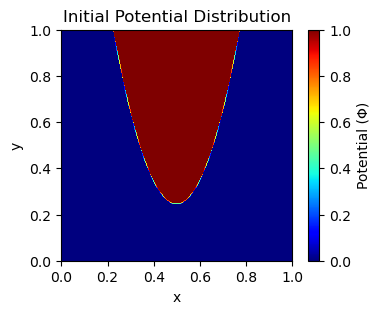

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x_tip = 0.5
y_tip = 0.25
R = 0.05
N = 256

# fn returns the y-pos (in actual values) corresponding to the y-value in the parabolic setup.
# takes into account the bounded nature of the problem [0,1]
def y(x):
    y_actual = (x - x_tip)**2 / (2 * R) + y_tip
    
    if y_actual<1:
        return y_actual
    else: # if value obtained from the parabolic equation is higher, then set it to one (as the Dirichlet condition applies to the y=1 boundary)
        return 1
    
    
h = 1/N
    
Phi = np.zeros((N+1, N+1))
   
# filling up the values for the initial state phi 
for i in range(0, N+1):
    x_pos = 0 + i*h
    y_pos = y(x_pos)
    
    y_pos_index = int(y_pos/h)
    # y_pos_index2 = np.ceil(y_pos/h).astype(int) # both yield more or less similar results
    # print(y_pos_index, y_pos_index2)

    # once we get the index beyond 
    for j in range(y_pos_index, N+1):
        Phi[i, j] = 1
        
        
# Visualization of the initial grid
plt.figure(figsize=(4, 3))
plt.imshow(Phi.T, origin='lower', extent=[0, 1, 0, 1], cmap='jet')
plt.colorbar(label='Potential (Φ)')
plt.title('Initial Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

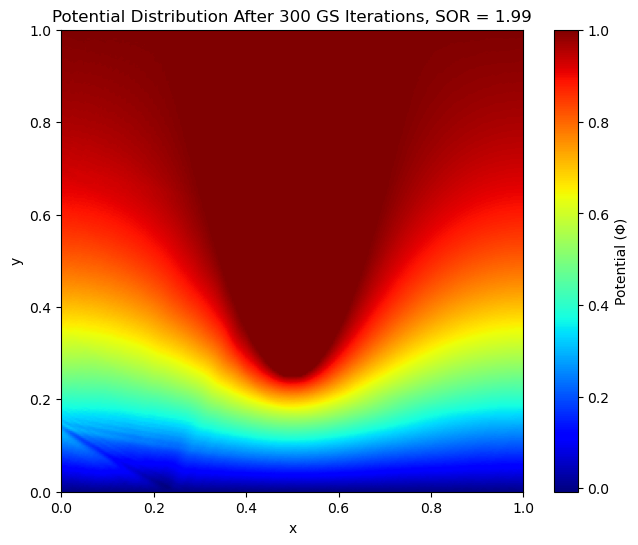

In [ ]:
def GaussSeidel(p):
    counter = 0 # counter for iterations

    while True:
        
        for i in range(0, N+1):
            y_pos = y(i*h)
            y_pos_index = int(y_pos/h)
            
            # note that the GS implementation must happen right until the index where the potential becomes = 1
            # this means the values of the phi = 1 must be involved in the computations of the GS iteration.
            # if the y_pos_index is reduced by 1, the plot will take a very different form (gradients of phi = 0.8, 0.6, etc disappear)
            for j in range(1, y_pos_index):
                Phi_current = Phi[i][j]
                if(i == 0):
                    term = 0.25*(Phi[i, j] + Phi[i, j-1] + Phi[i+1, j] + Phi[i, j+1])
                else:
                    if(i == N):
                        term = 0.25*(Phi[i-1, j] + Phi[i, j-1] + Phi[i, j] + Phi[i, j+1])
                    else:
                        term = 0.25*(Phi[i-1, j] + Phi[i, j-1] + Phi[i+1, j] + Phi[i, j+1])
                Phi[i, j] = p * term + (1-p)*Phi_current
        
        if counter == 600:
            break
        counter  = counter + 1
        
    # Visualization of the relaxed potential
    plt.figure(figsize=(8, 6))
    plt.imshow(Phi.T, origin='lower', extent=[0, 1, 0, 1], cmap='jet')
    plt.colorbar(label='Potential (Φ)')
    plt.title(f'Potential Distribution After {counter} GS Iterations, SOR = {p}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()    
    
GaussSeidel(p=1.99)